In [1]:
import numpy as np
import pandas as pd
import os

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings

In [19]:
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'C:\Users\vinee\CodingBlocks\Datasets\ml-100k\u.data',sep='\t',header=None)

In [8]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
df.shape

(100000, 4)

In [11]:
column_names = 'user_id item_id rating timestamp'.split()
df.columns = column_names

In [12]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [32]:
df['user_id'].nunique()

943

In [33]:
df['item_id'].nunique()

1682

In [25]:
titles = pd.read_csv(r'C:\Users\vinee\CodingBlocks\Datasets\ml-100k\u.item',sep='\|',header=None)

In [26]:
titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
titles = titles[[0,1]]

In [28]:
titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [29]:
titles.columns = 'item_id title'.split()

In [30]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [31]:
titles.shape

(1682, 2)

In [34]:
df = pd.merge(df,titles,on='item_id')

In [35]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [36]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [43]:
#average rating of movies
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [41]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

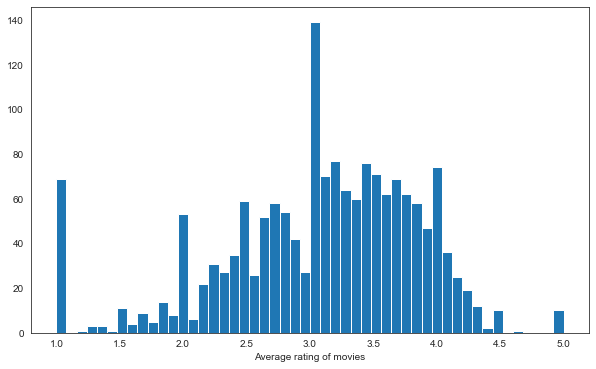

In [48]:
sns.set_style('white')
plt.figure(figsize=(10,6))
plt.hist(df.groupby('title').mean()['rating'],bins=50)
plt.xlabel('Average rating of movies')
plt.show()

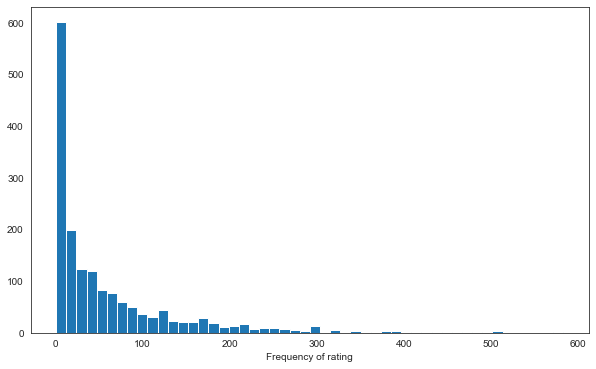

In [49]:
sns.set_style('white')
plt.figure(figsize=(10,6))
plt.hist(df.groupby('title').count()['rating'],bins=50)
plt.xlabel('Frequency of rating')
plt.show()

In [50]:
#there are so many movies which have very less rating..we would like to recommend those movies which have number of ratings > 100

In [58]:
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [63]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'].values,columns=['AvgRating'])

In [65]:
ratings['NumOfRatings'] = df.groupby('title').count()['rating'].values

In [66]:
ratings.head()

,AvgRating,NumOfRatings
0,2.333333,9
1,2.600000,5
2,2.908257,109
3,4.344000,125
4,3.024390,41


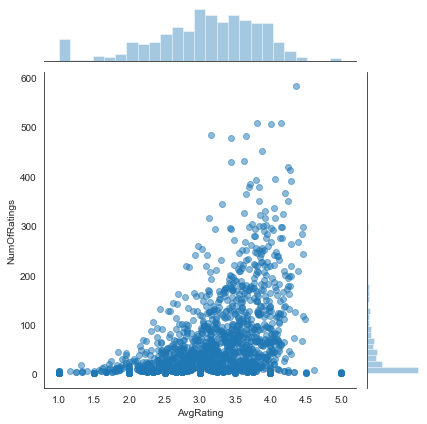

In [69]:
sns.jointplot(x='AvgRating',y='NumOfRatings',data=ratings,alpha=0.5)

In [70]:
# positive correlation 5 are exceptions..kaafi kam logo ne rate kia h maybe islie

In [78]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
fargo_user_ratings = moviemat['Fargo (1996)']

In [80]:
fargo_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      NaN
5      5.0
      ... 
939    NaN
940    3.0
941    NaN
942    NaN
943    5.0
Name: Fargo (1996), Length: 943, dtype: float64

In [90]:
similar_to_fargo = pd.DataFrame(moviemat.corrwith(fargo_user_ratings),columns=['Correlation'])

In [92]:
similar_to_fargo.dropna(inplace=True)

In [95]:
ratings.shape

(1664, 2)

In [103]:
ratings.head(10)

,AvgRating,NumOfRatings
0,2.333333,9
1,2.600000,5
2,2.908257,109
3,4.344000,125
4,3.024390,41
5,3.225806,93
6,3.500000,72
7,3.969112,259
8,1.000000,5
9,4.050847,59


In [96]:
similar_to_fargo.shape

(1396, 1)

In [102]:
similar_to_fargo.join(ratings['NumOfRatings']).tail()

,Correlation,NumOfRatings
title,,
Young Guns (1988),0.050227,NaN
Young Guns II (1990),-0.018688,NaN
"Young Poisoner's Handbook, The (1995)",-0.034345,NaN
Zeus and Roxanne (1997),-0.353553,NaN
unknown,-0.101768,NaN
